In [2]:
import numpy as np
import json
from os import listdir
from os.path import isfile, join
import matplotlib as plt
from IPython.display import Image
from sklearn.neighbors import NearestNeighbors
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
#prints out all the filepaths for the images

# PATH_IMG = u'/root/Etsy-sov/SBIR_regression/lampshades_images/images_8_27'
PATH_IMG = u'lampshades_images/images_8_27'

filepaths = []
for subdir, dirs, files in os.walk(PATH_IMG):
    for filename in files:
        filepath = subdir + os.sep + filename
        if filepath.endswith(".npy"):
            #print (filepath)
            filepaths.append(filepath)
            
jpg_of_images = []
for thing in filepaths:
    jpg_of_images.append(thing[0:-7])
            
#just the numpy arrays
just_numpy_arrays_images = []
for thing in jpg_of_images:
    just_numpy_arrays_images.append(np.load("{}_np.npy".format(thing)))
test_data=np.array(just_numpy_arrays_images)
data = np.array(just_numpy_arrays_images)

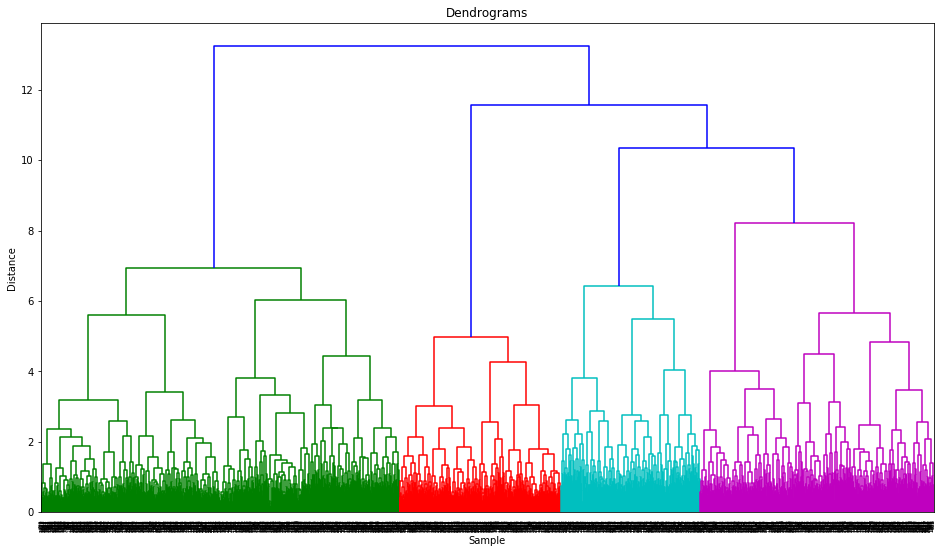

In [80]:
### Divisive Hierarchal Clustering
from sklearn.metrics.pairwise import pairwise_distances
import sys
%matplotlib inline
import matplotlib.pyplot as plt 

from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage

data_scaled = normalize(data)
linked = linkage(data_scaled, 'ward') # ward minimizes variant between clusters

plt.figure(figsize=(16, 9))  
plt.title("Dendrograms")  
plt.ylabel("Distance")
plt.xlabel("Sample")
dend = dendrogram(
    linked,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=True
)


### Cluster, Centroid

In [81]:
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import silhouette_score

data = np.array(just_numpy_arrays_images)

def the_function(data, n_clusters):
    """
    Cluster
    Pairwise
    Label
    """

    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(data)
    centroids = kmeans.cluster_centers_ # 10 clusters, 256 features
    closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, data)
    label = kmeans.predict(X)
    print("Silhouette Score(n={}): {}".format(n_clusters, silhouette_score(data, label)))

the_function(data_scaled, 10)    

Silhouette Score(n=10): 0.0686616227031


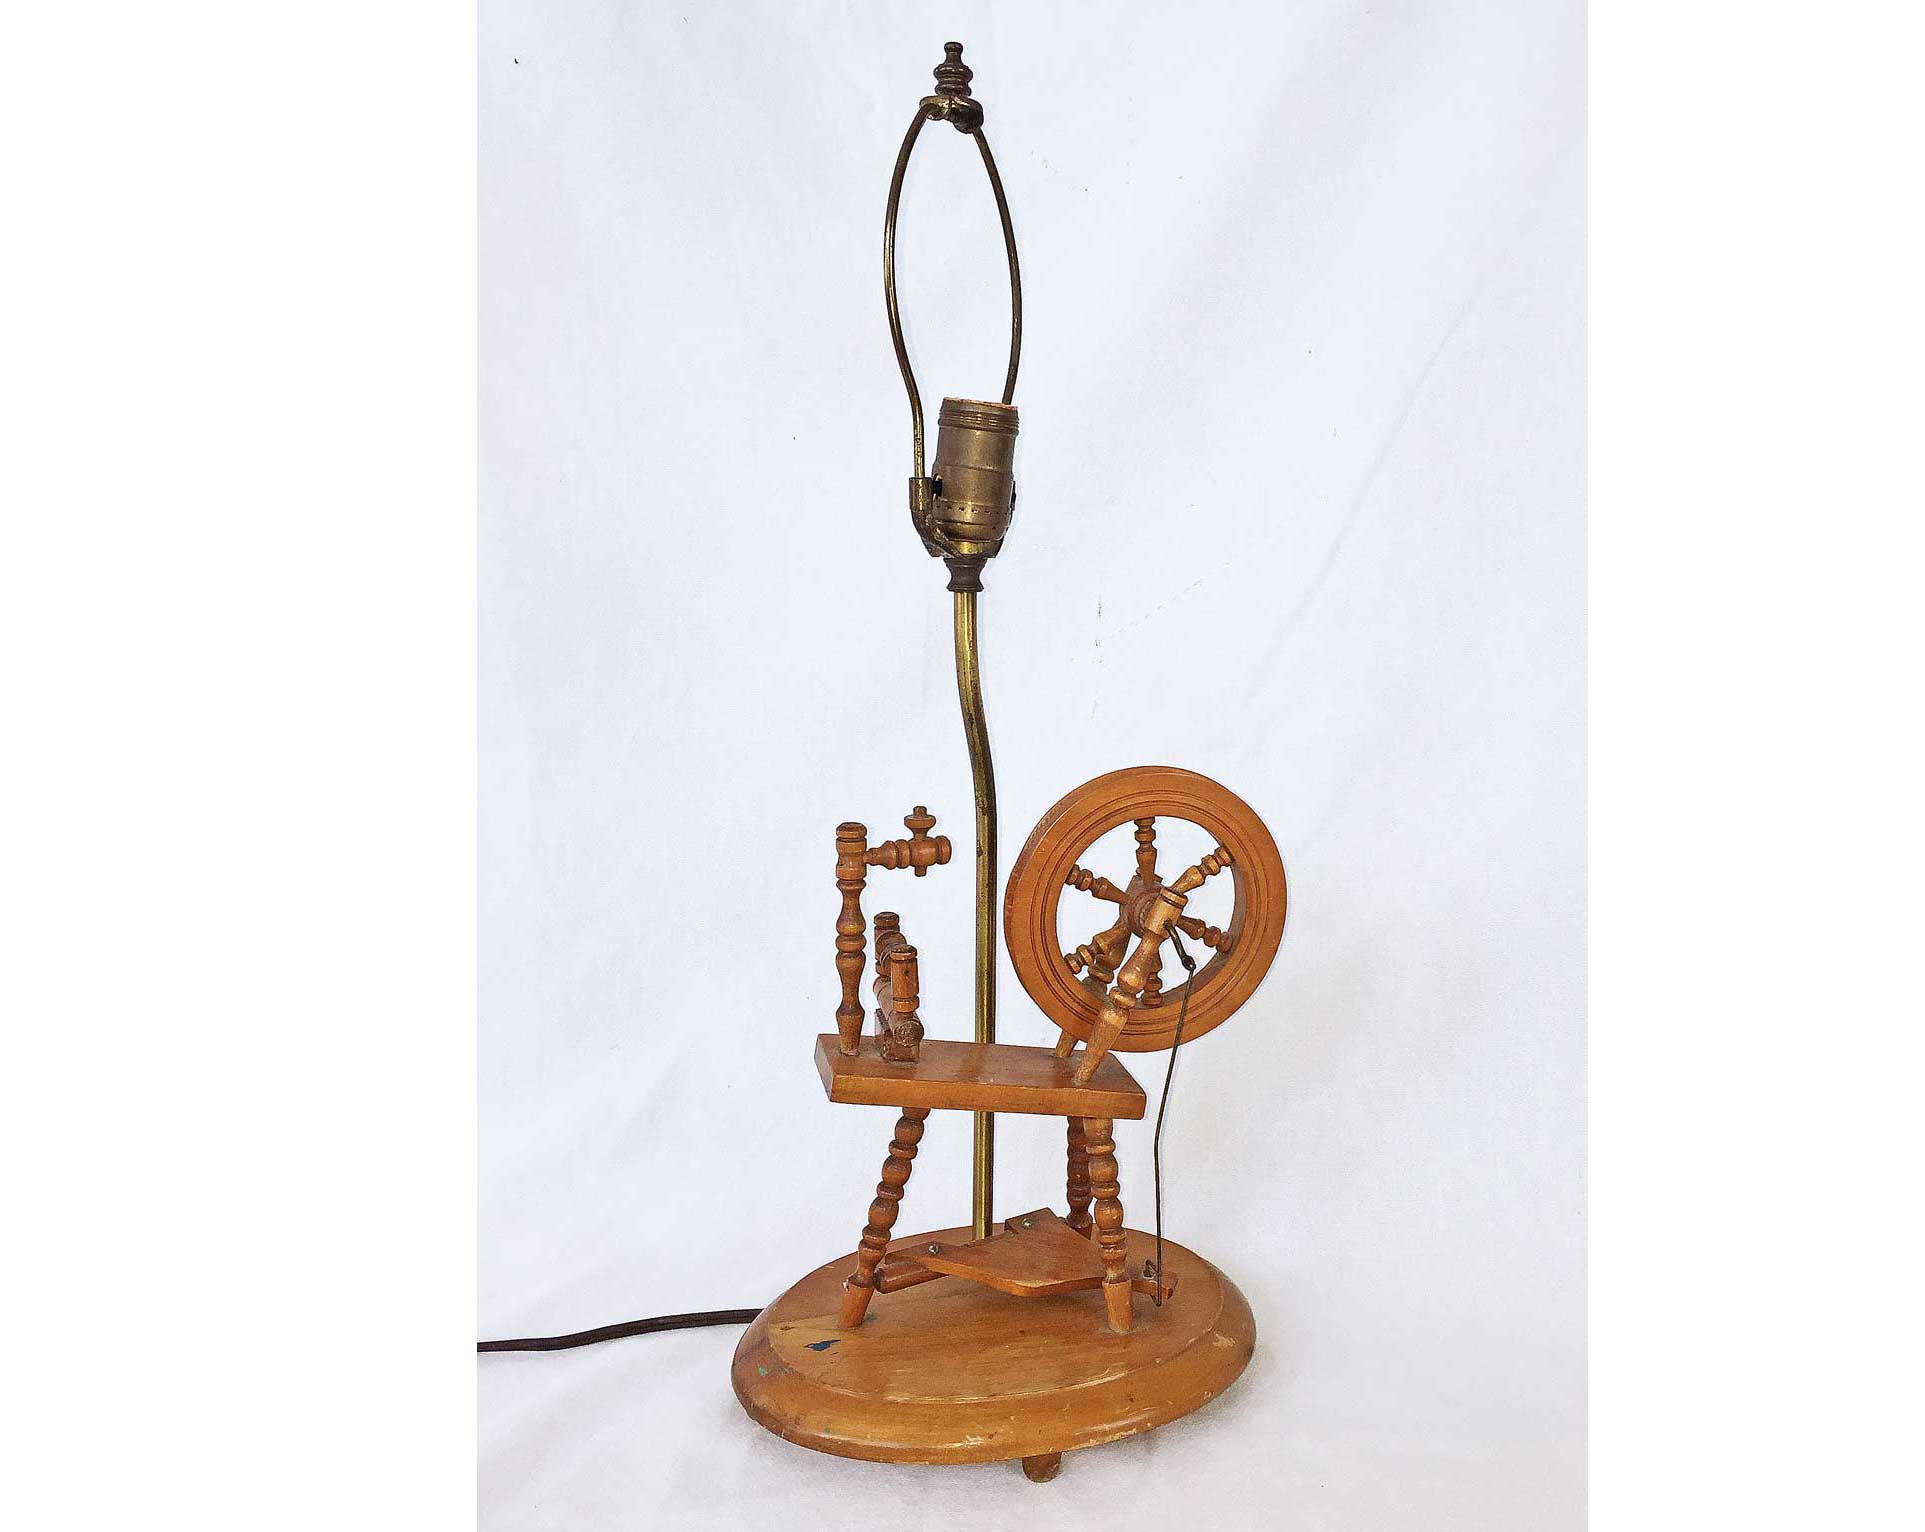

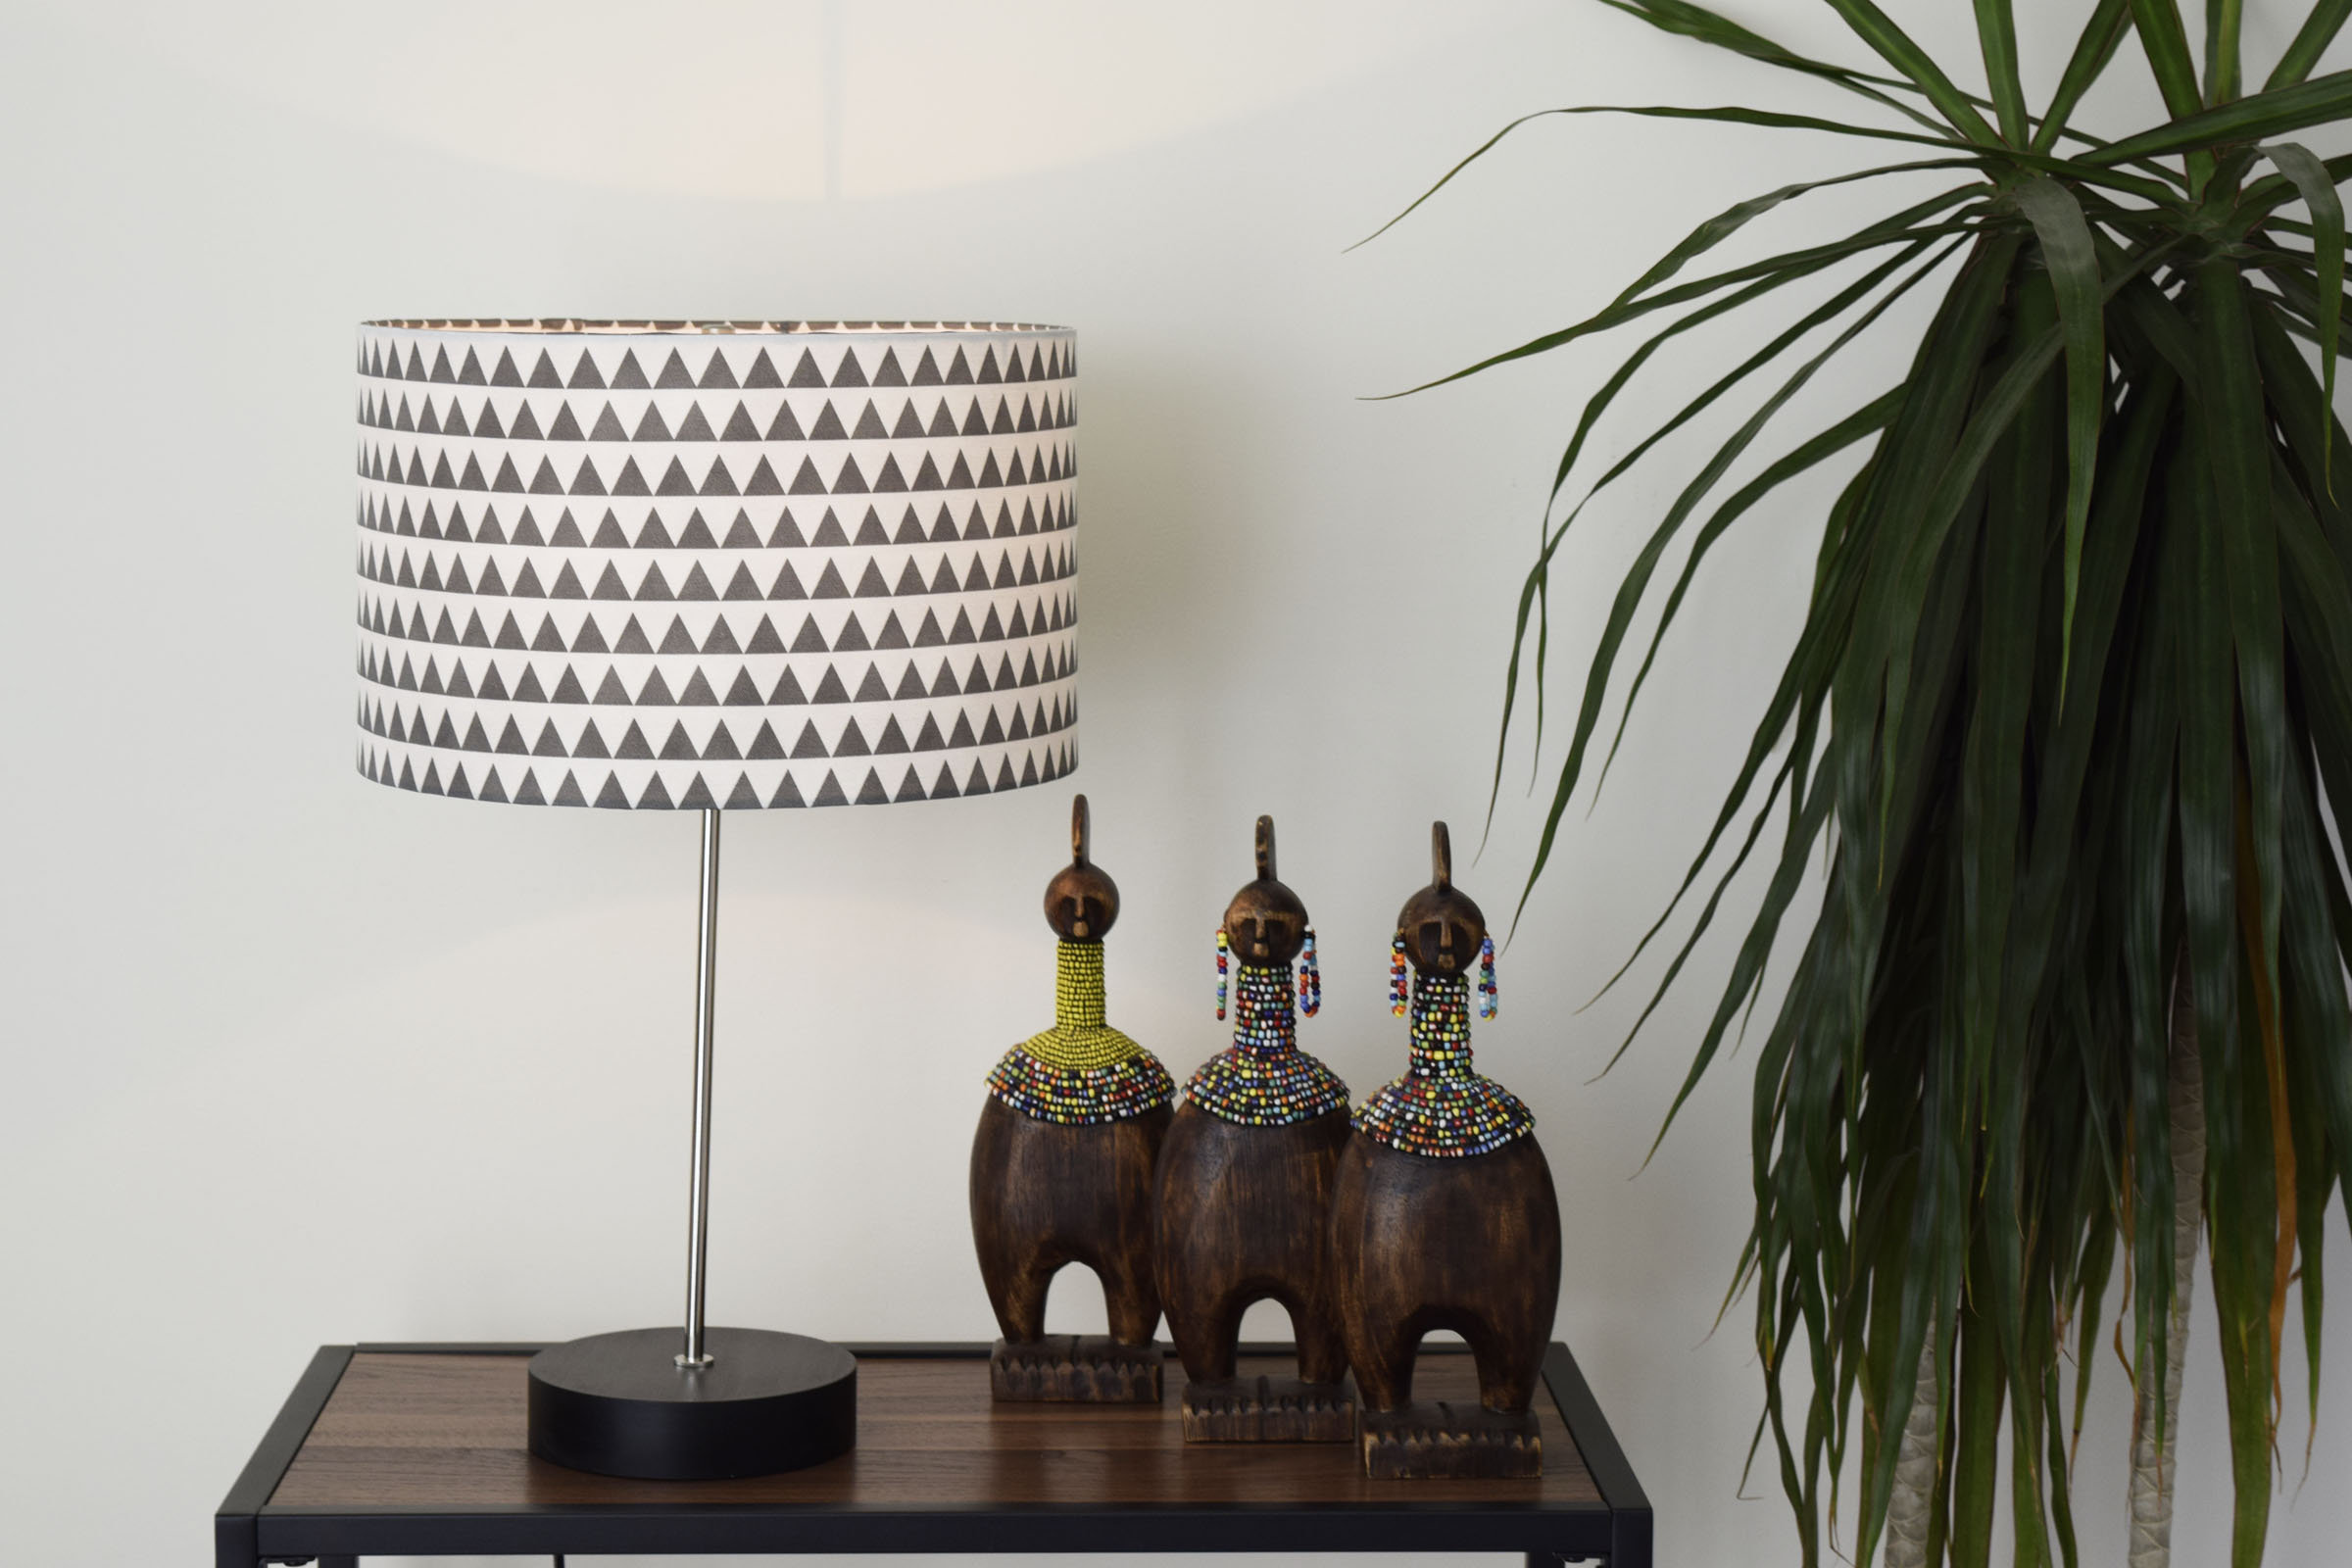

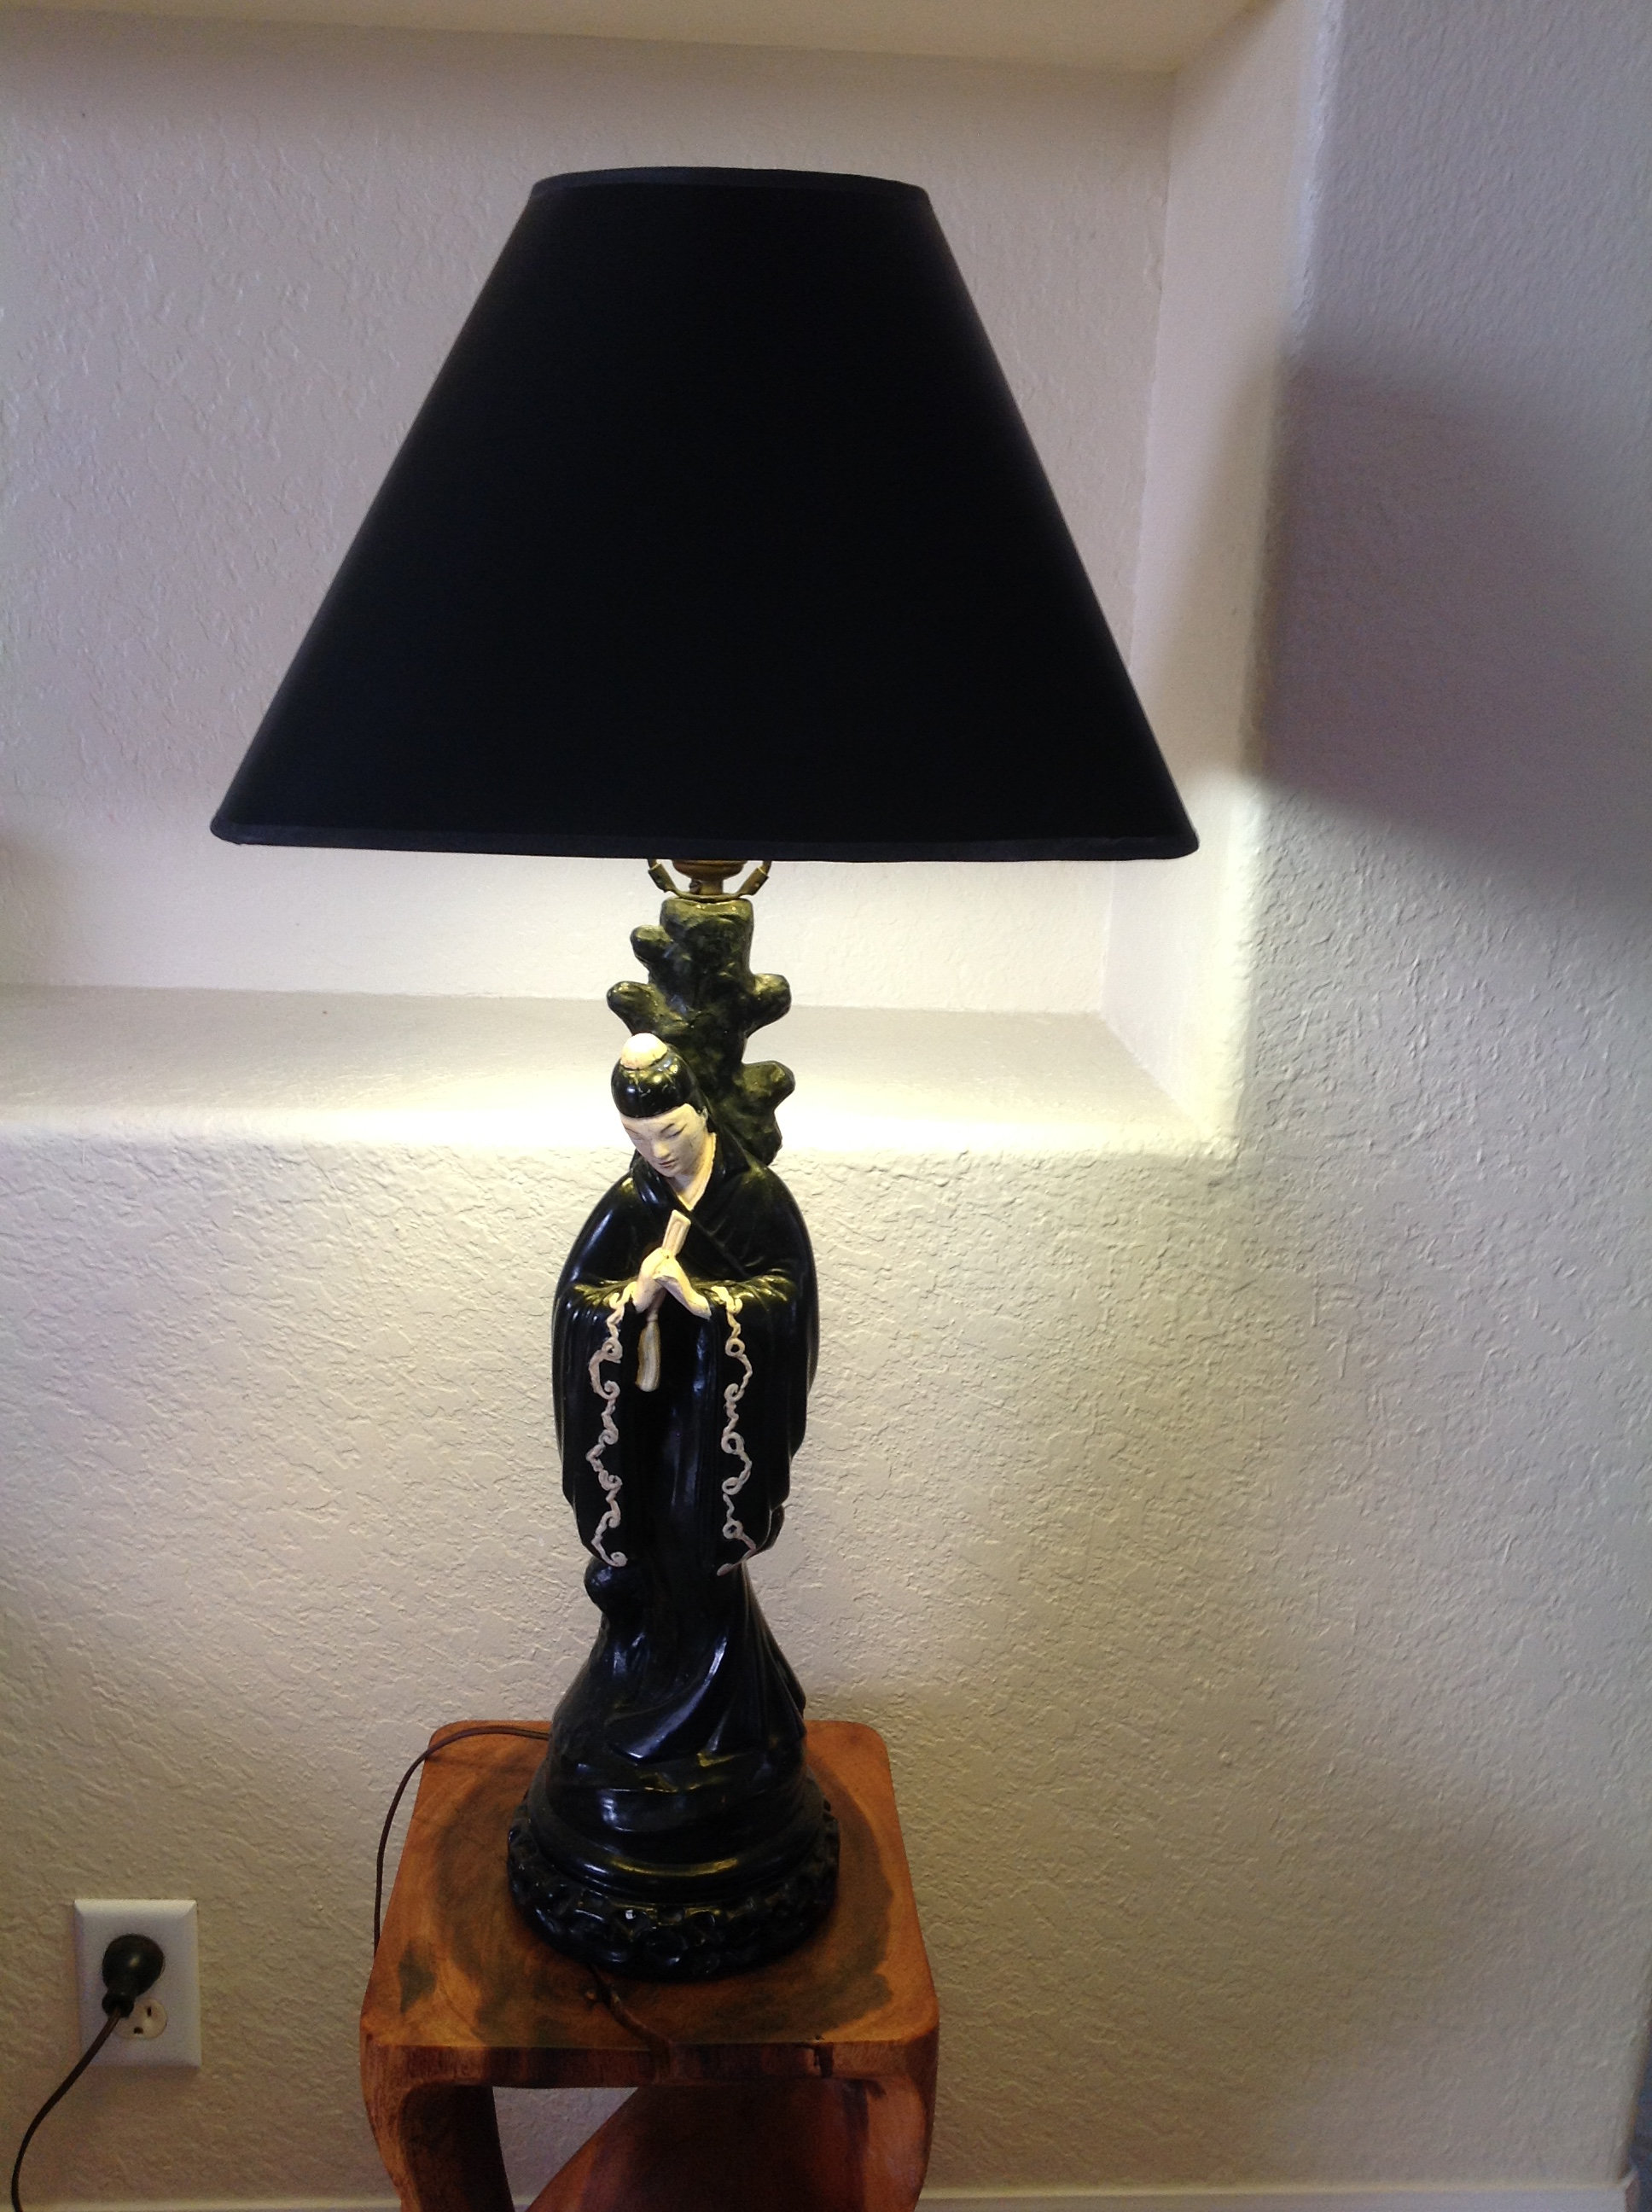

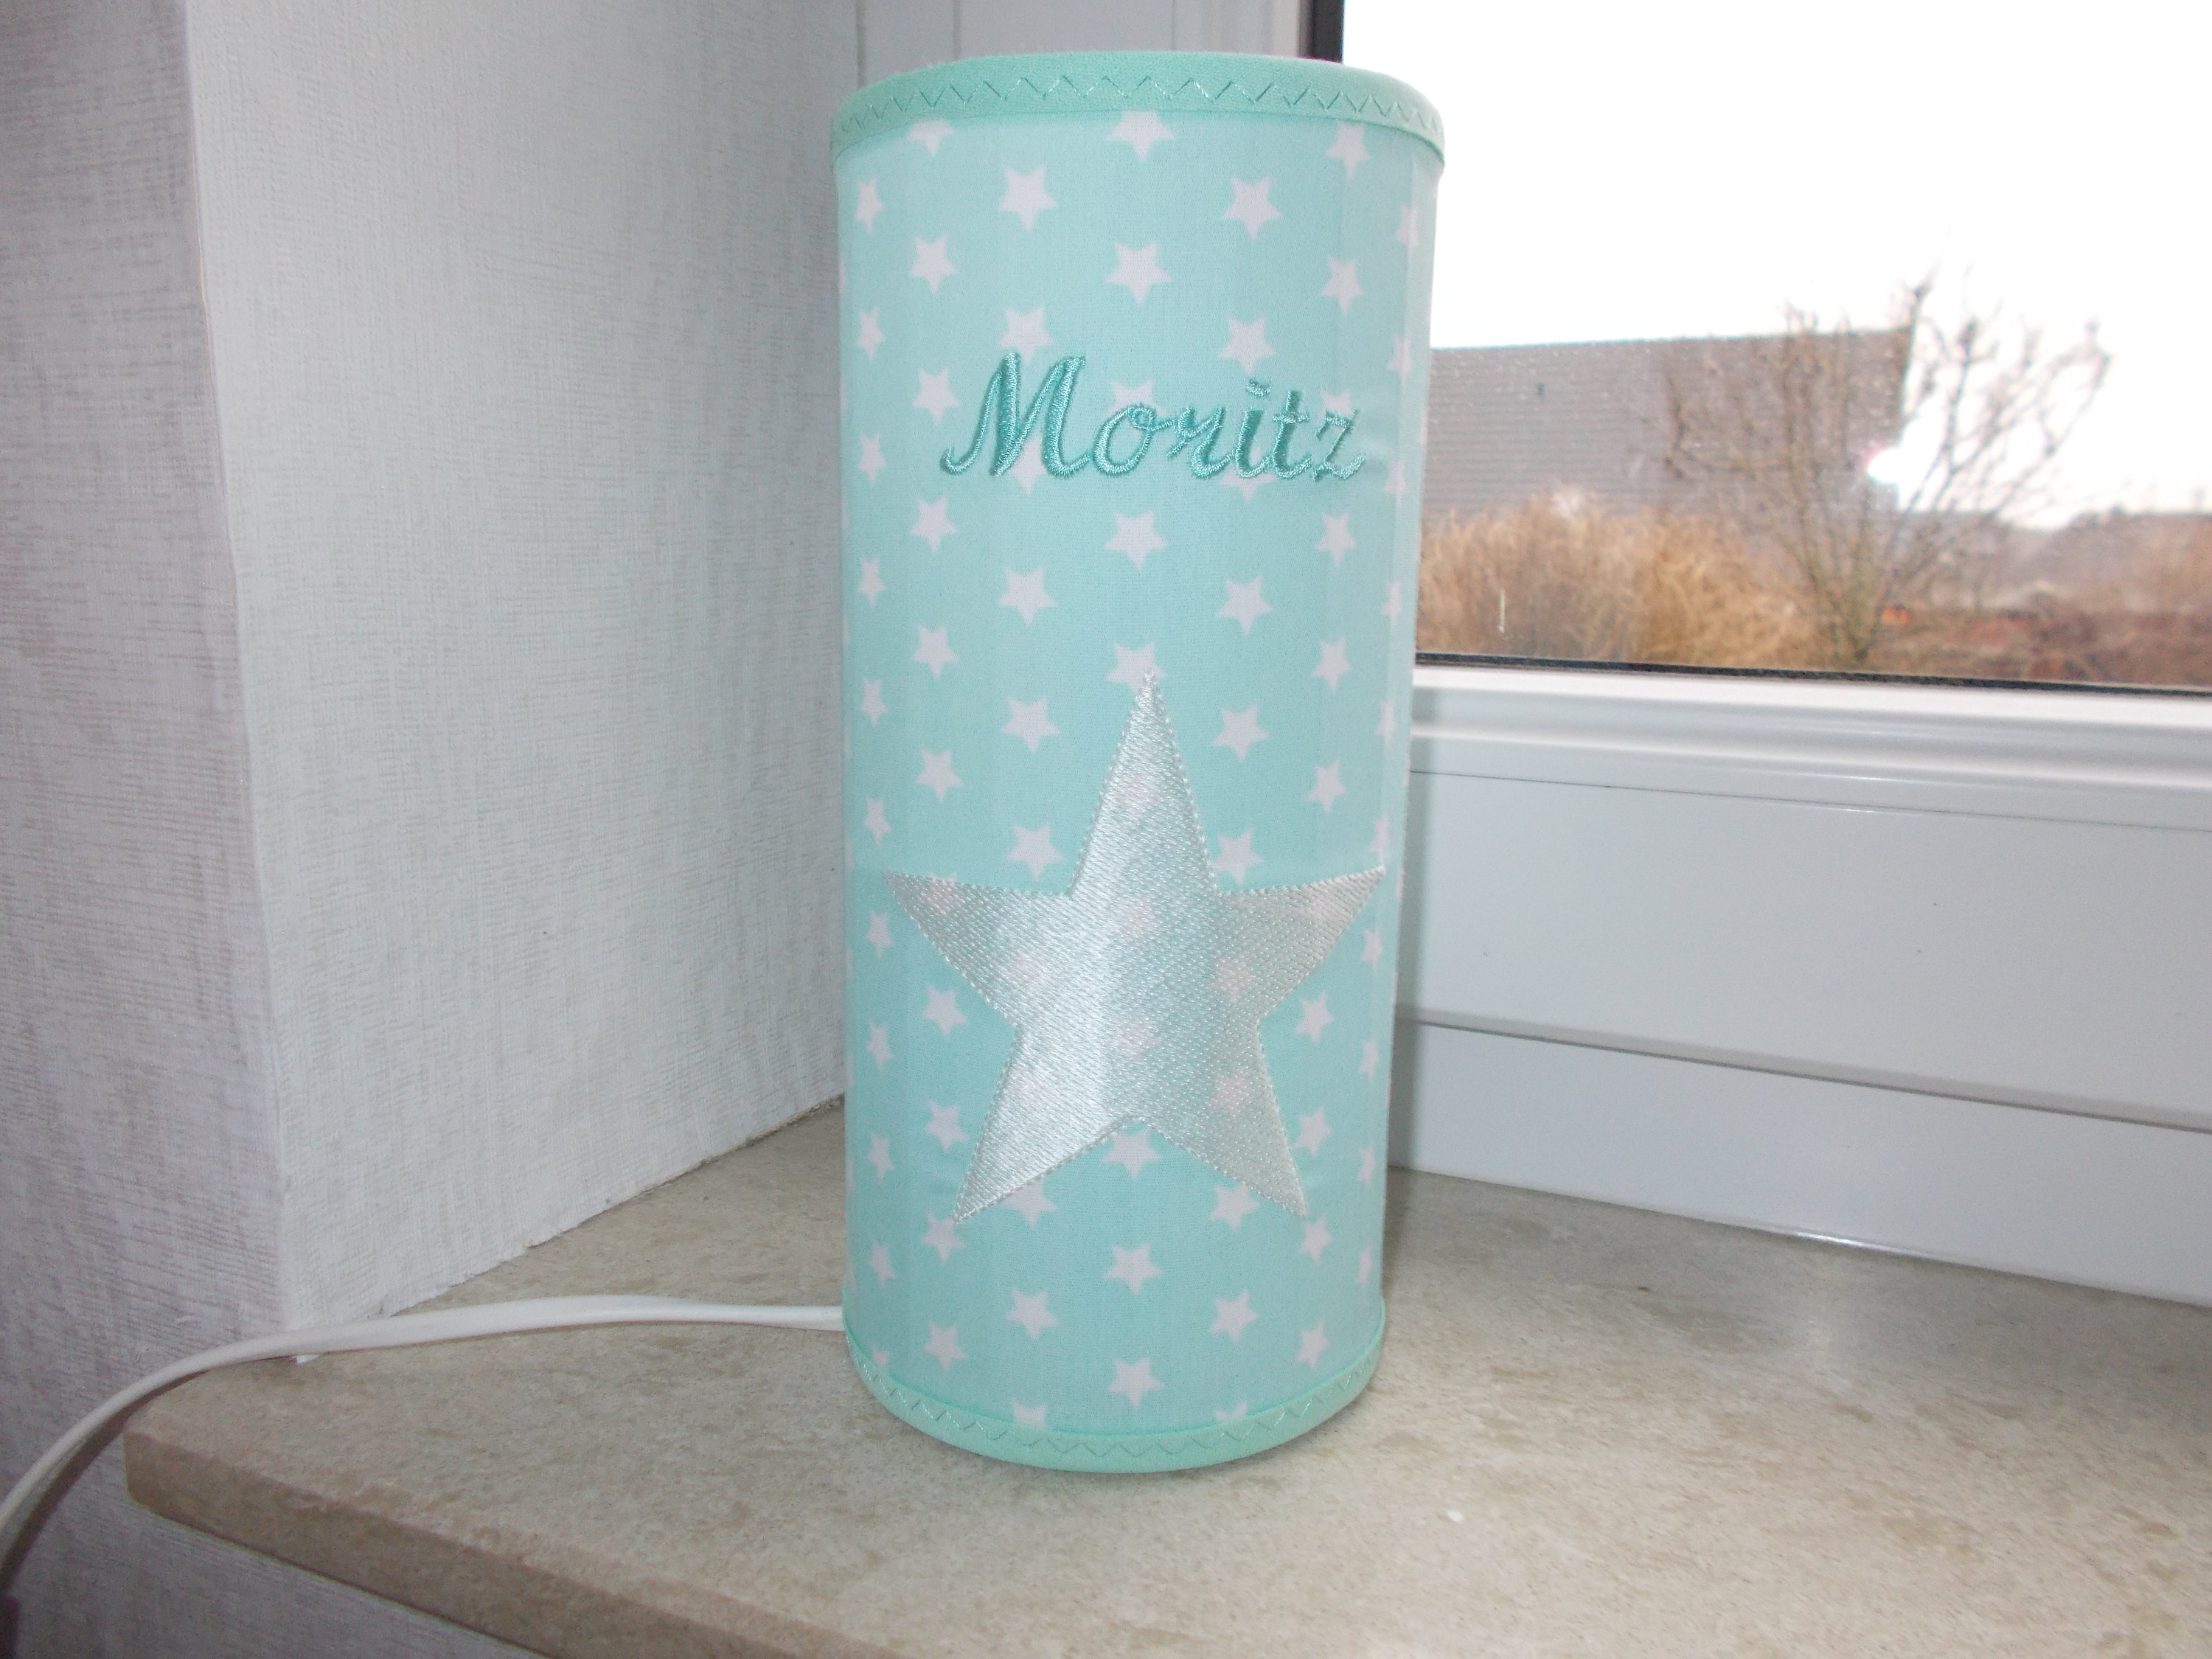

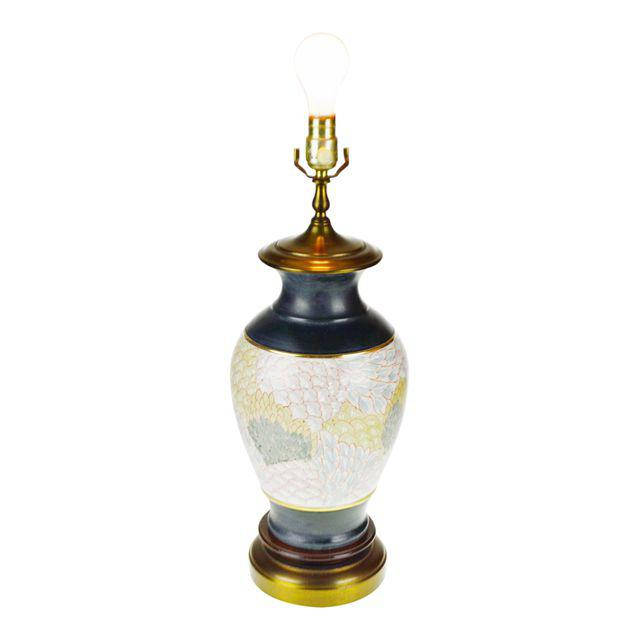

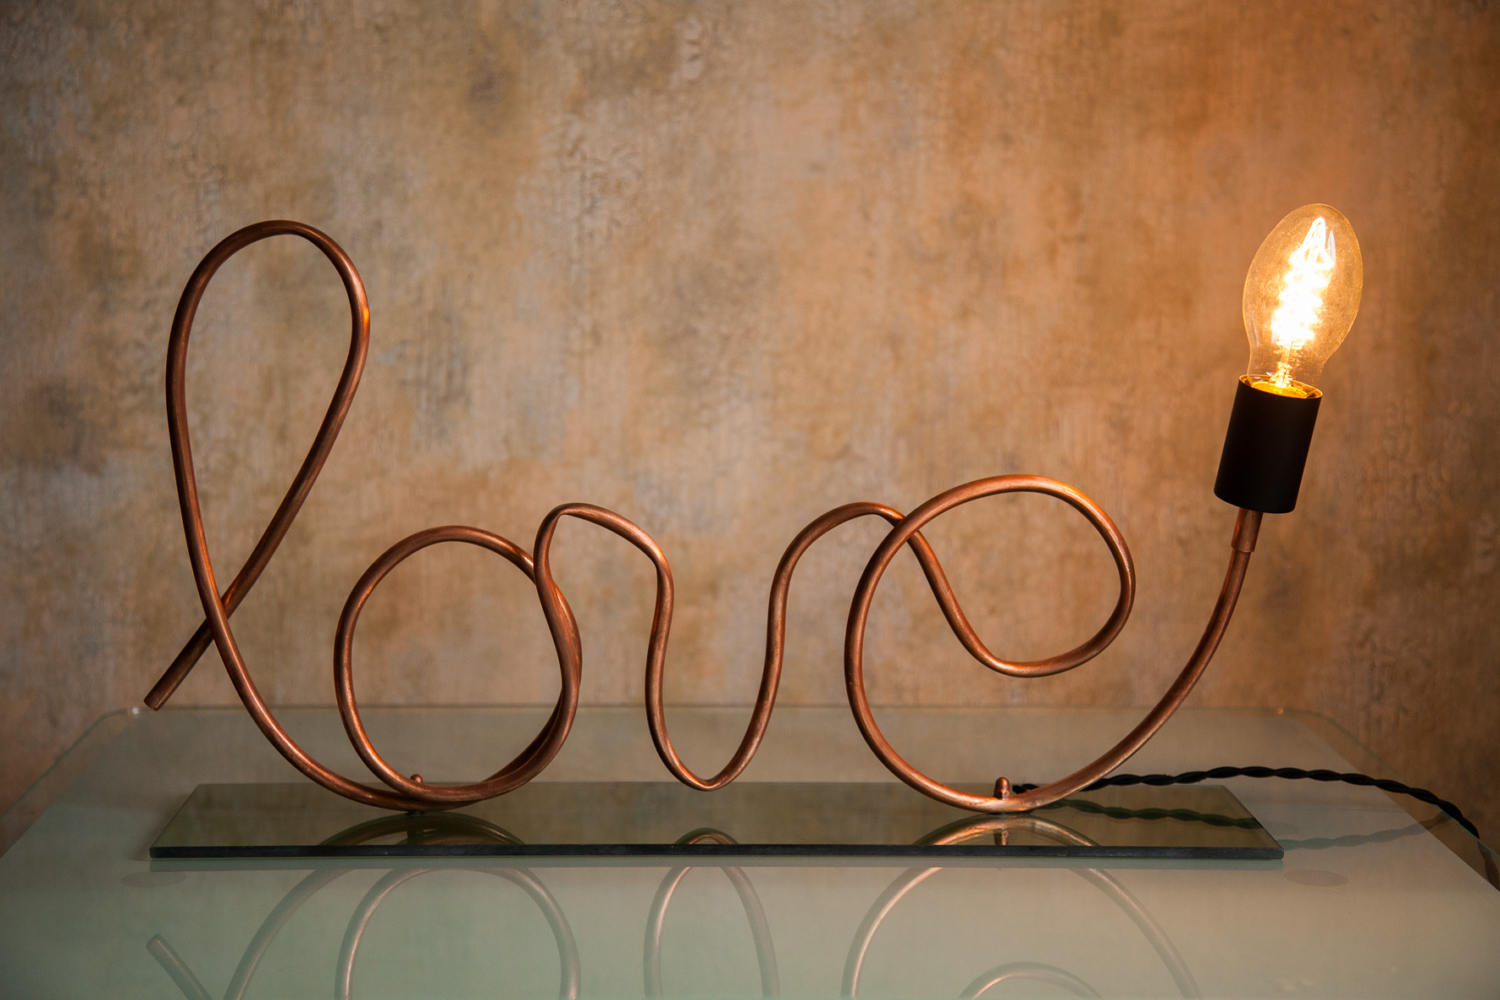

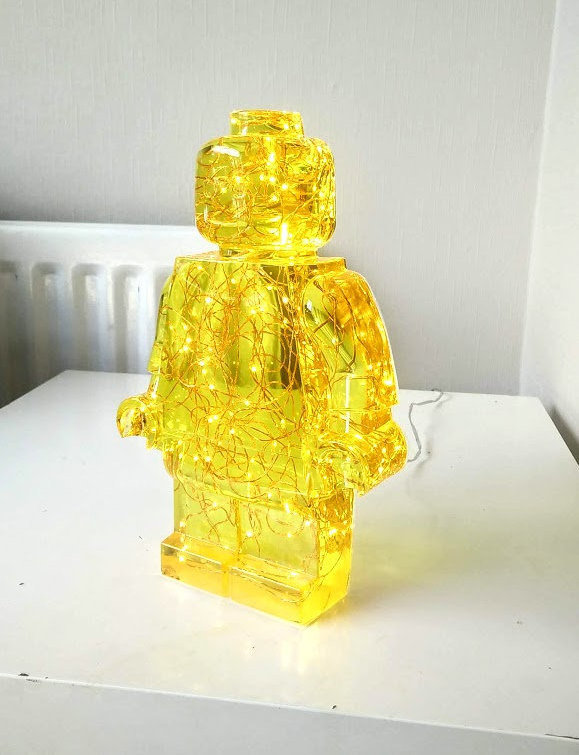

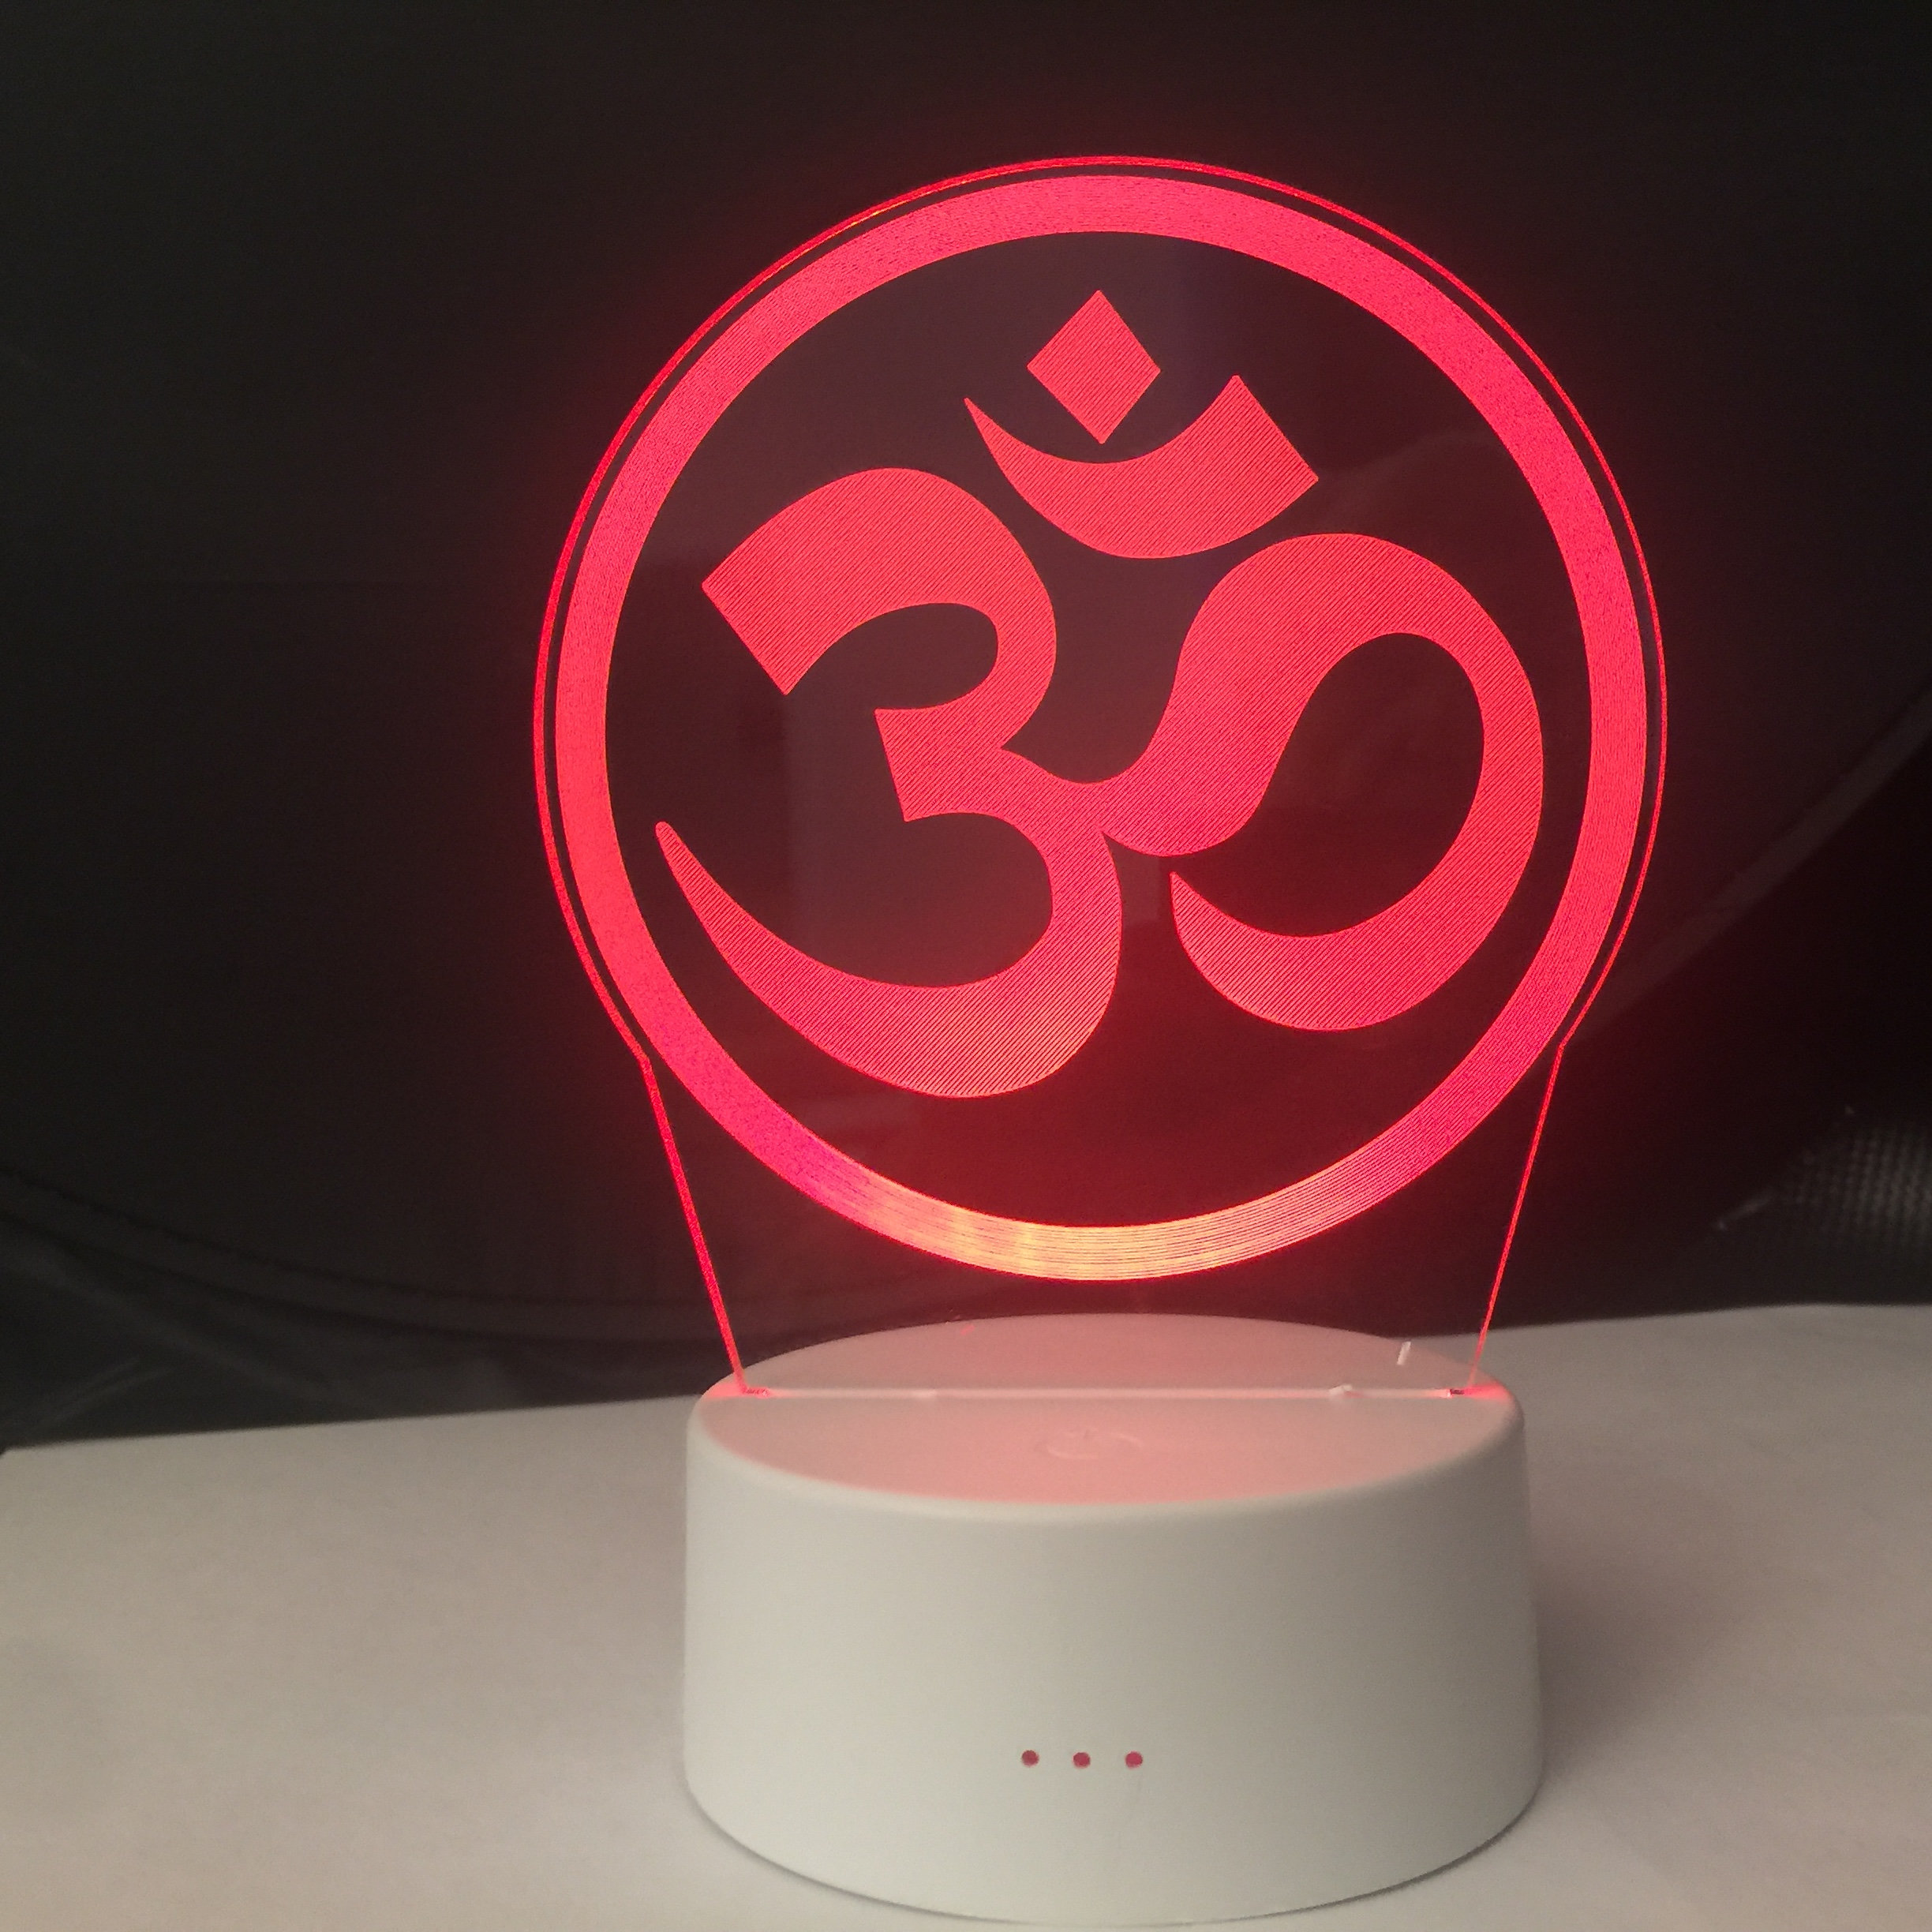

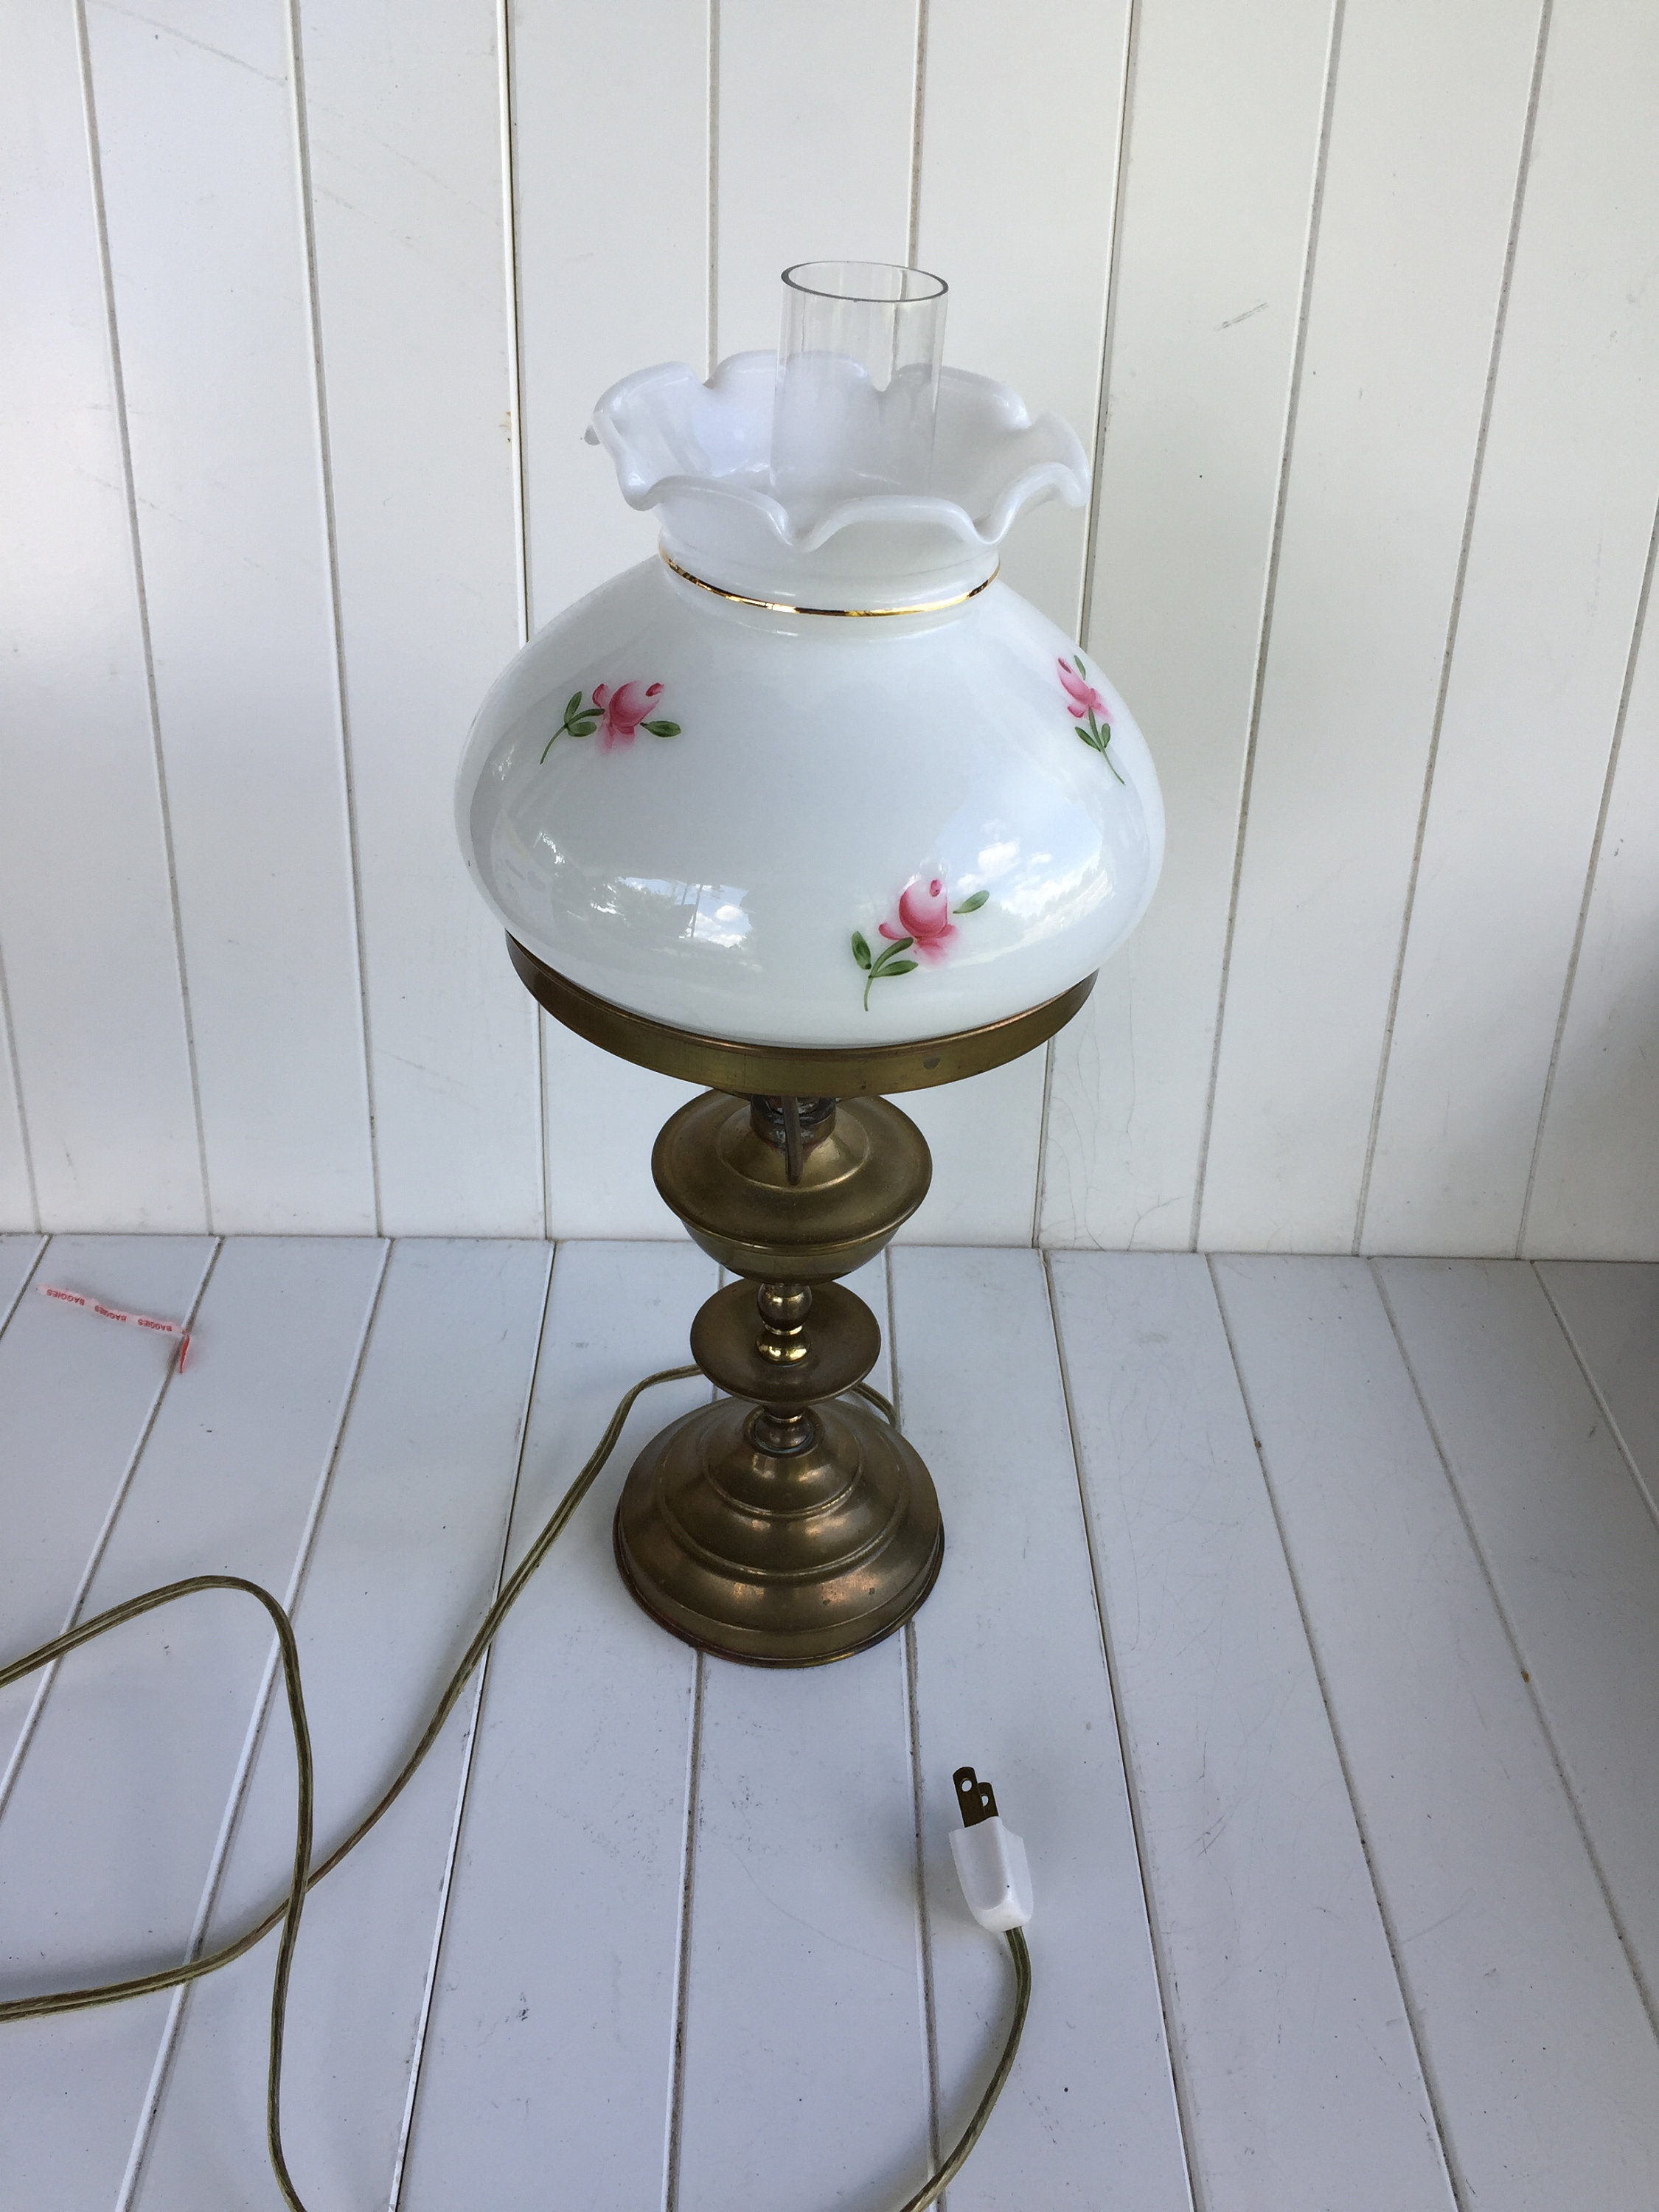

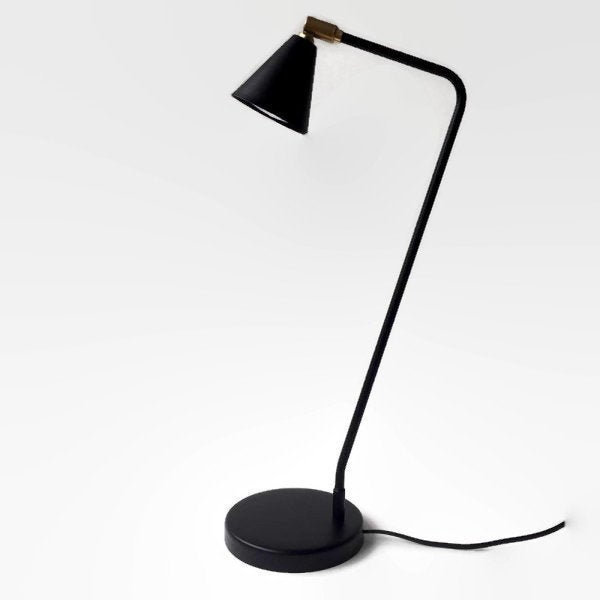

In [82]:
def get_centroids(jpg_of_images, closest):
    for index in closest:
        x = jpg_of_images[index]
        display(Image(filename='{}'.format(x)))


get_centroids(jpg_of_images, closest)

### tSNE and PCA

In [84]:
from time import time
import numpy as np
from sklearn import metrics

import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
             discriminant_analysis, random_projection)

X = data_scaled
n_samples, n_features = X.shape

kmeans = KMeans(n_clusters=10, random_state=0).fit(data_scaled)
centroids = kmeans.cluster_centers_ # 10 clusters, 256 features

Computing PCA projection
Computing t-SNE embedding


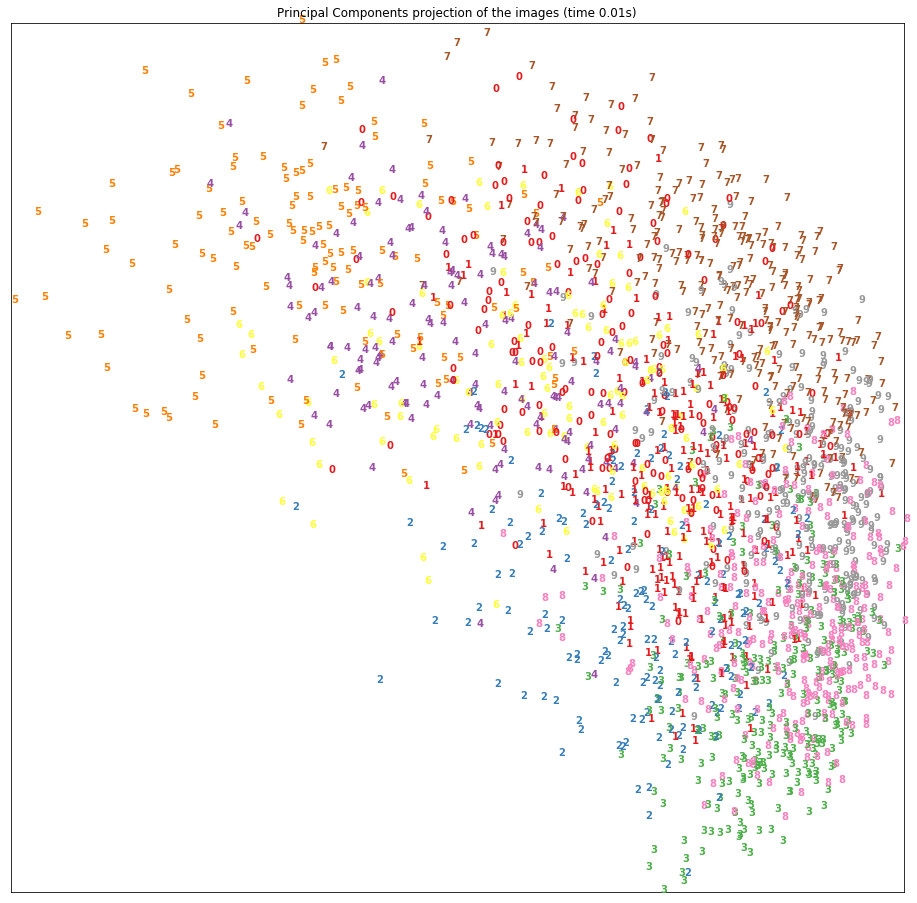

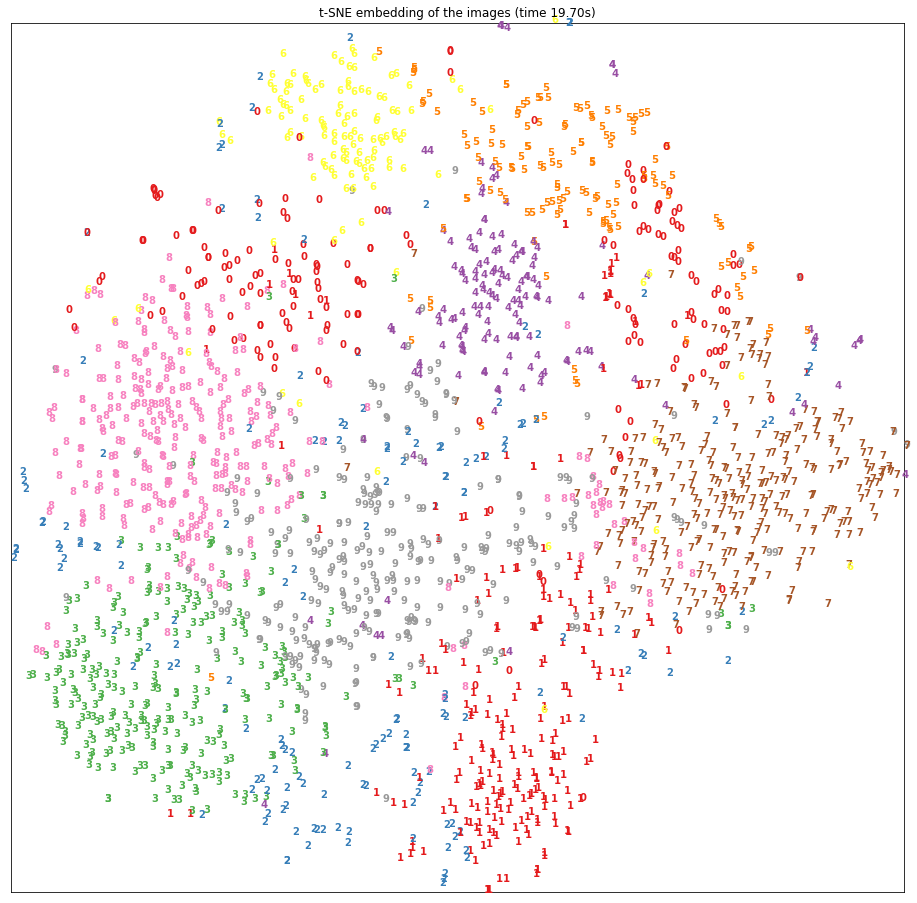

In [85]:
## Function to Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)  
    plt.figure(figsize=(16,16))
    ax = plt.subplot(111)

    for i in range(X.shape[0]-1): # X.shape = 2186, 2

        plt.text(X[i, 0], X[i, 1], 
                 str(kmeans.labels_[i]), # LEN 2186
                 color=plt.cm.Set1(kmeans.labels_[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 10})
    if hasattr(offsetbox, 'AnnotationBbox'):
        ## only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                ## don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]

    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

#----------------------------------------------------------------------

## Computing PCA
print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,
               "Principal Components projection of the images (time %.2fs)" %
               (time() - t0))
## Computing t-SNE
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne,
               "t-SNE embedding of the images (time %.2fs)" %
               (time() - t0))
plt.show()

### Silhouette and Centroids

('For n_clusters =', 2, 'The average silhouette_score is :', 0.120060116)
('For n_clusters =', 3, 'The average silhouette_score is :', 0.08746164)
('For n_clusters =', 4, 'The average silhouette_score is :', 0.08364608)
('For n_clusters =', 5, 'The average silhouette_score is :', 0.07667639)
('For n_clusters =', 6, 'The average silhouette_score is :', 0.08154736)
('For n_clusters =', 7, 'The average silhouette_score is :', 0.06647319)
('For n_clusters =', 8, 'The average silhouette_score is :', 0.07101065)
('For n_clusters =', 9, 'The average silhouette_score is :', 0.06722112)
('For n_clusters =', 10, 'The average silhouette_score is :', 0.06866162)


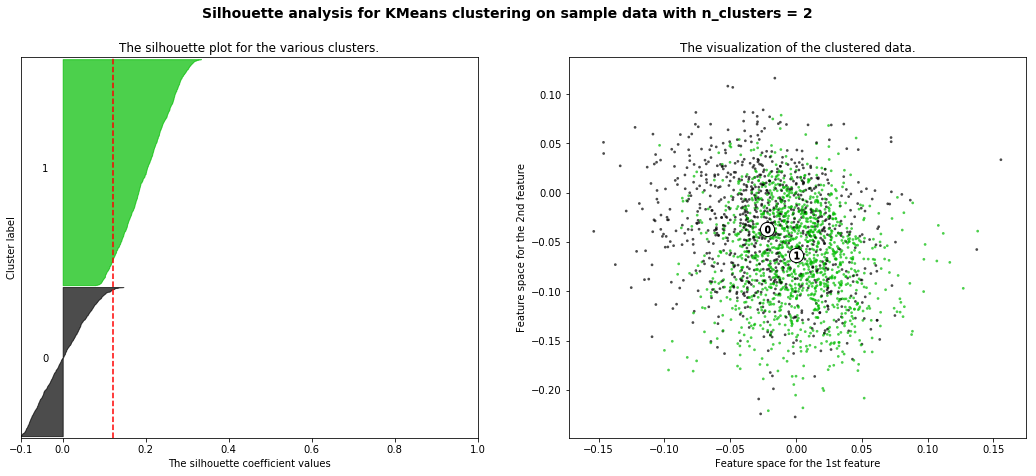

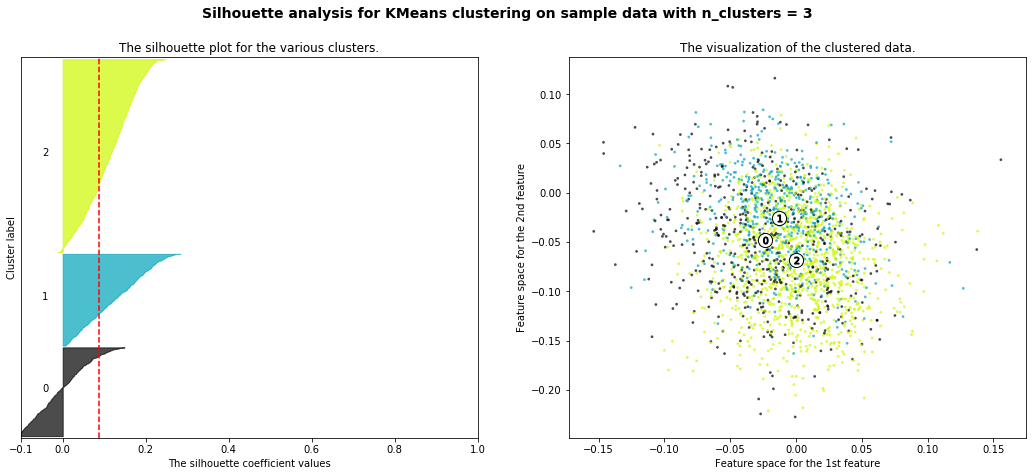

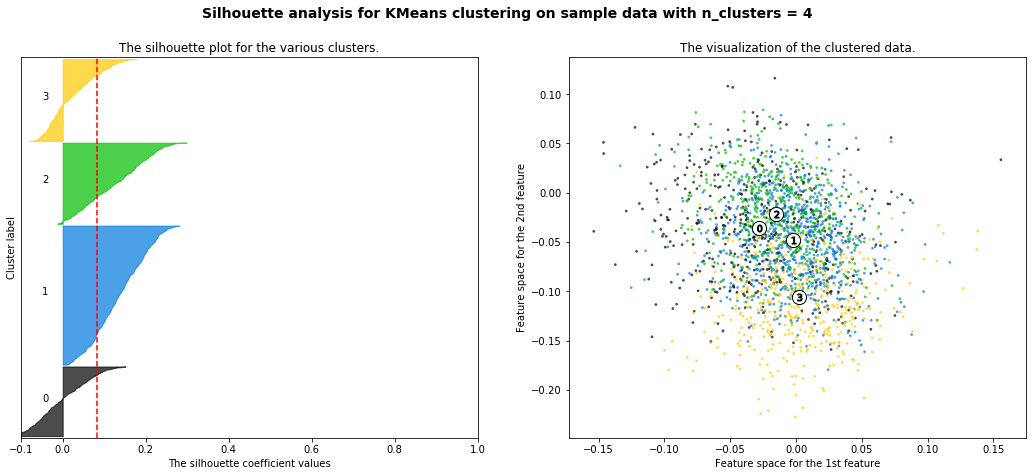

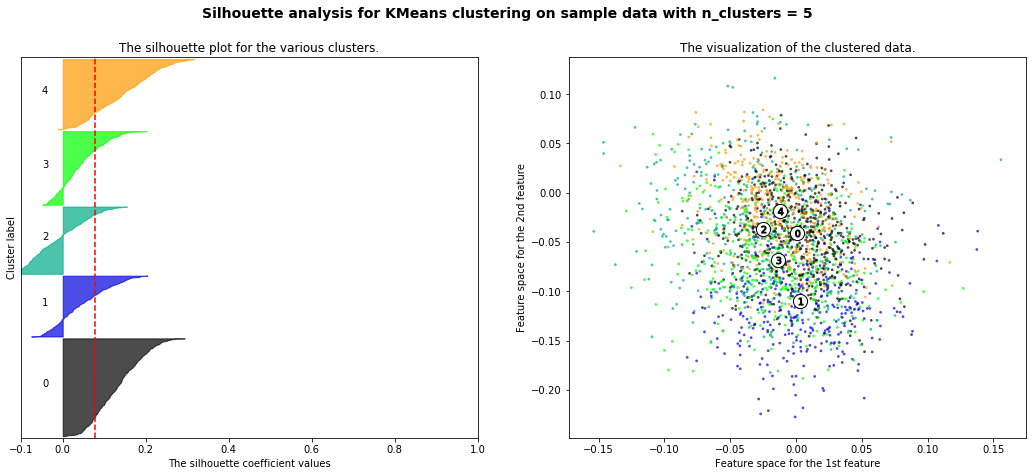

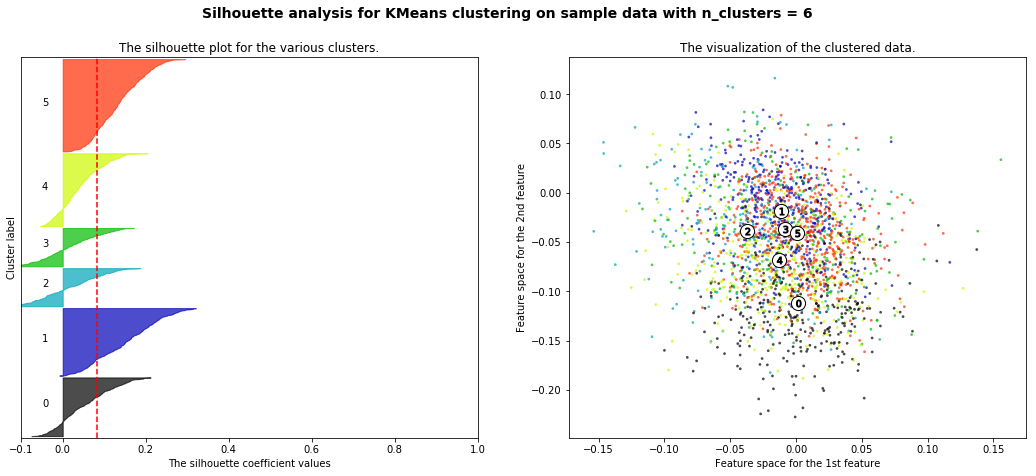

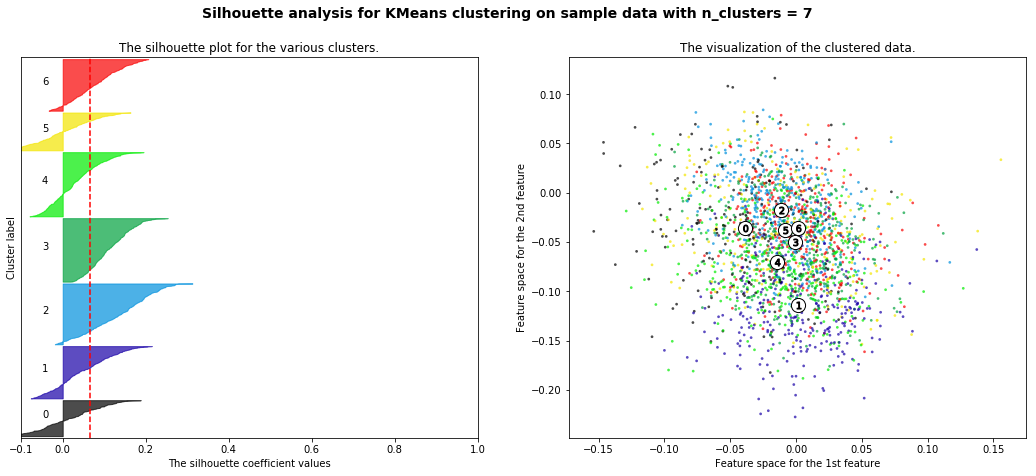

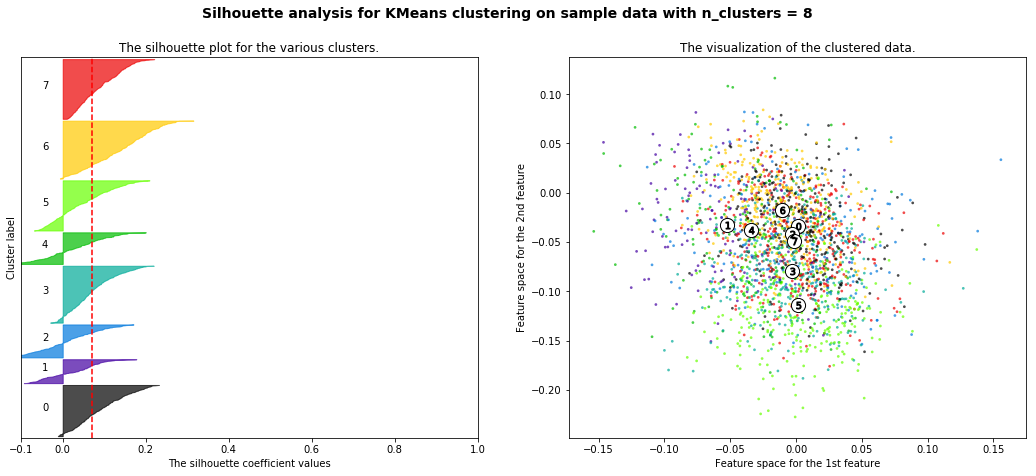

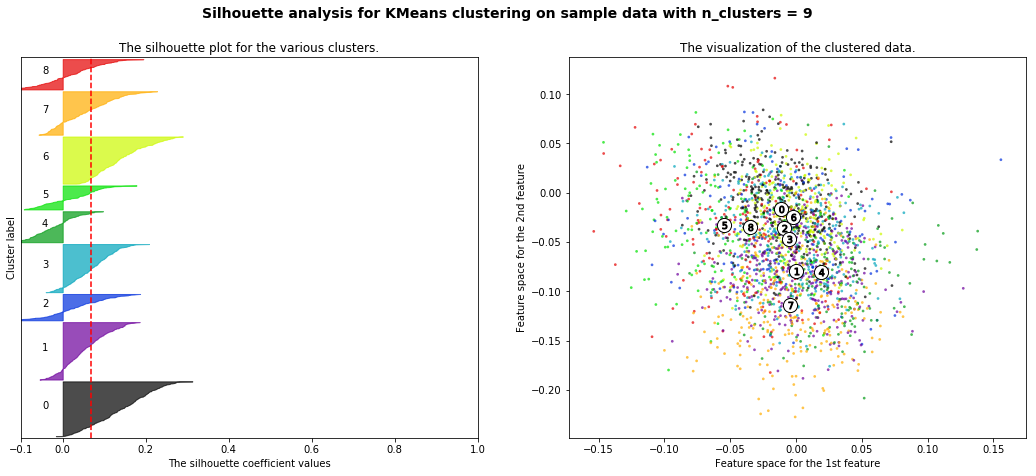

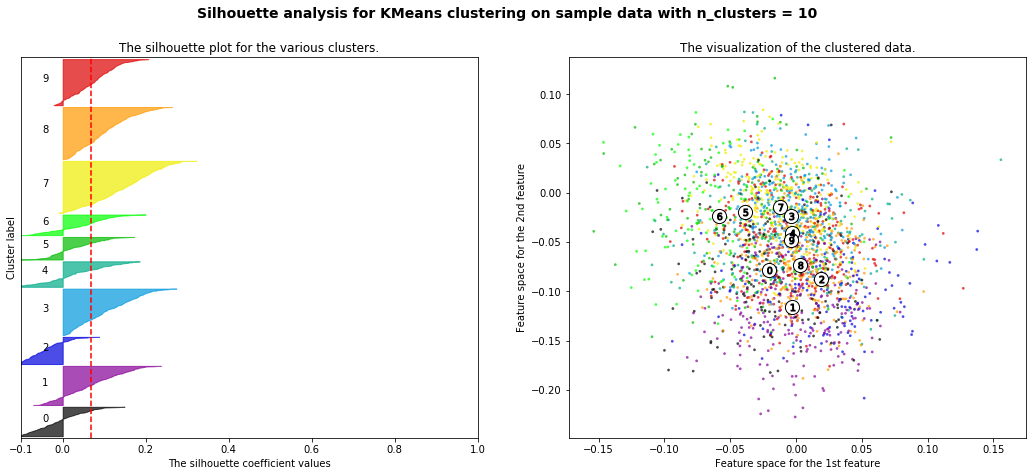

In [86]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


range_n_clusters = list(range(2,11))

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()